### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1) Importing Libraries & Data 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [38]:
df = pd.read_csv("data\stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3) Data Cleaning & EDA

In [39]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [40]:
df.shape

(1000, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates

In [44]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values

In [45]:
print("values in categorical column")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].value_counts().to_dict()}")


values in categorical column
gender: {'female': 518, 'male': 482}
race_ethnicity: {'group C': 319, 'group D': 262, 'group B': 190, 'group E': 140, 'group A': 89}
parental_level_of_education: {'some college': 226, "associate's degree": 222, 'high school': 196, 'some high school': 179, "bachelor's degree": 118, "master's degree": 59}
lunch: {'standard': 645, 'free/reduced': 355}
test_preparation_course: {'none': 642, 'completed': 358}


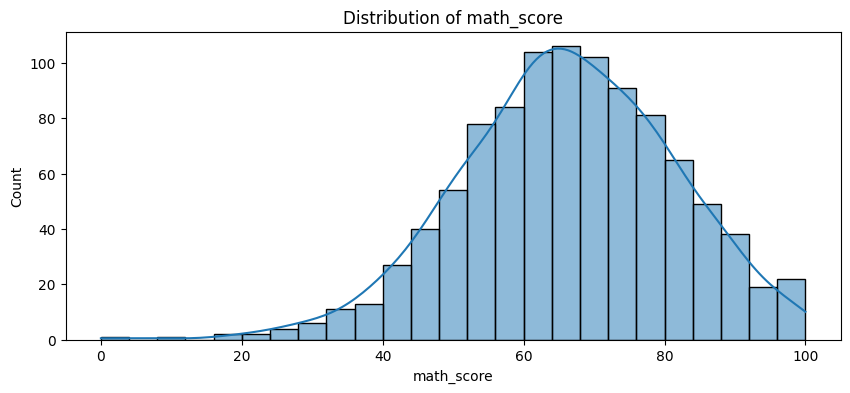

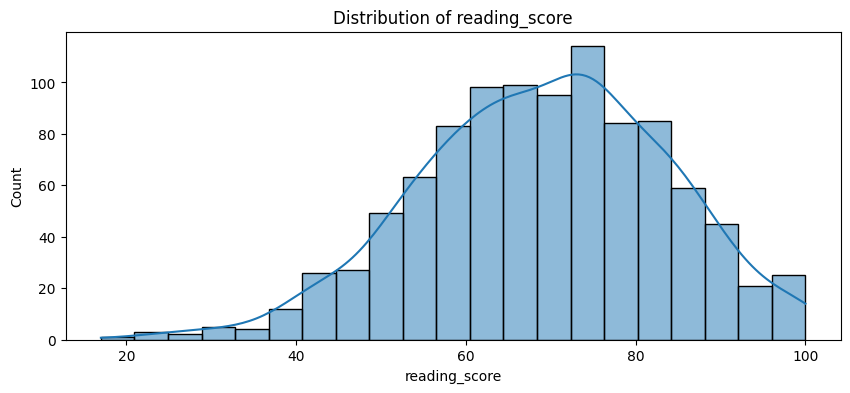

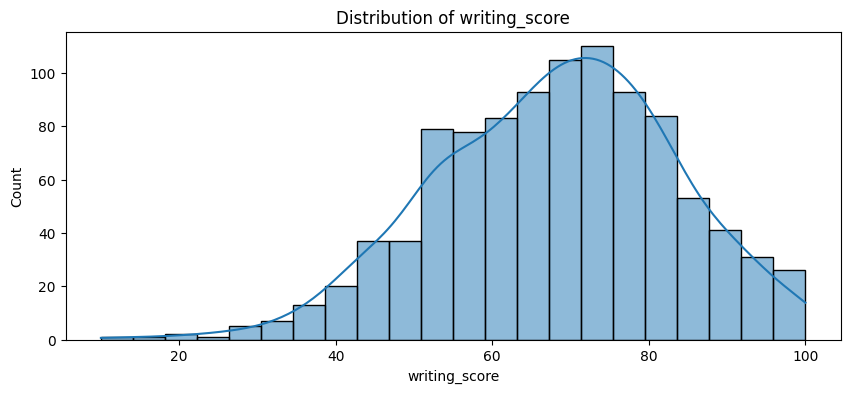

In [46]:
#Check Distrubution 
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show() 

- The distribution is normal for numerical cols

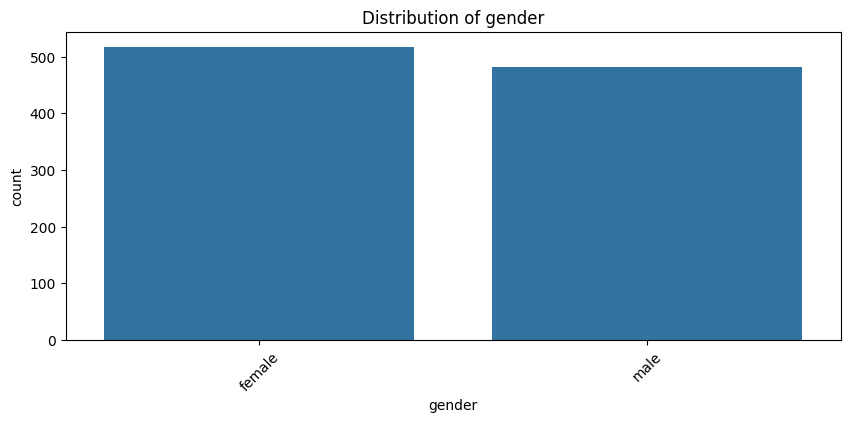

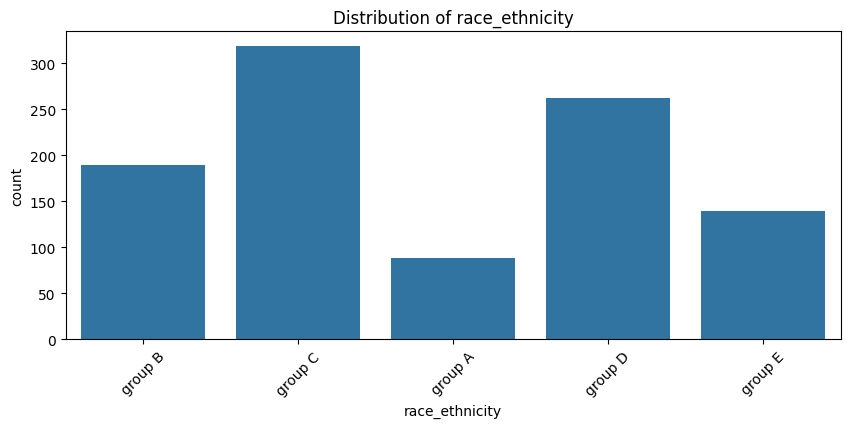

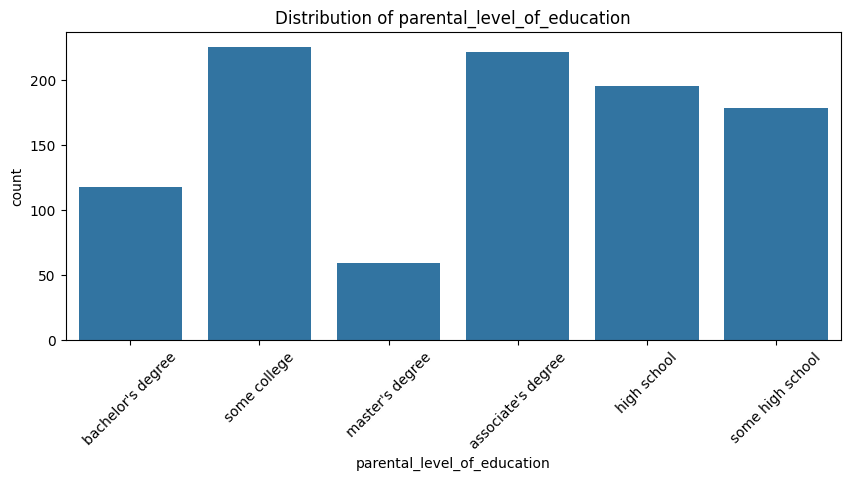

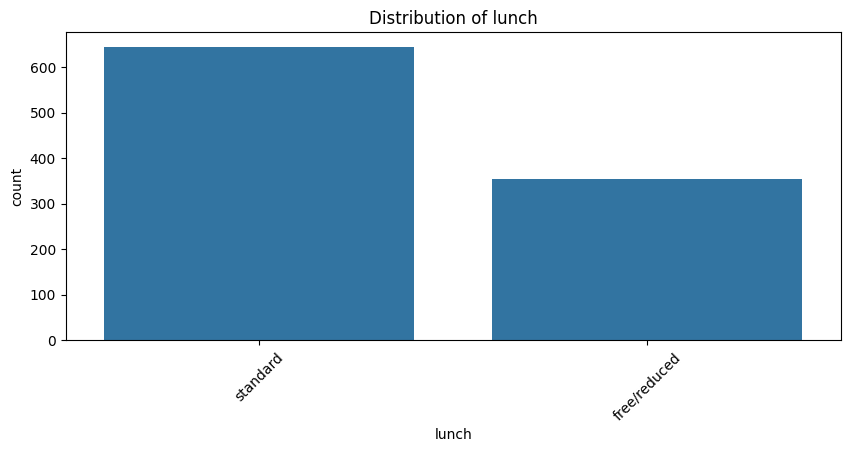

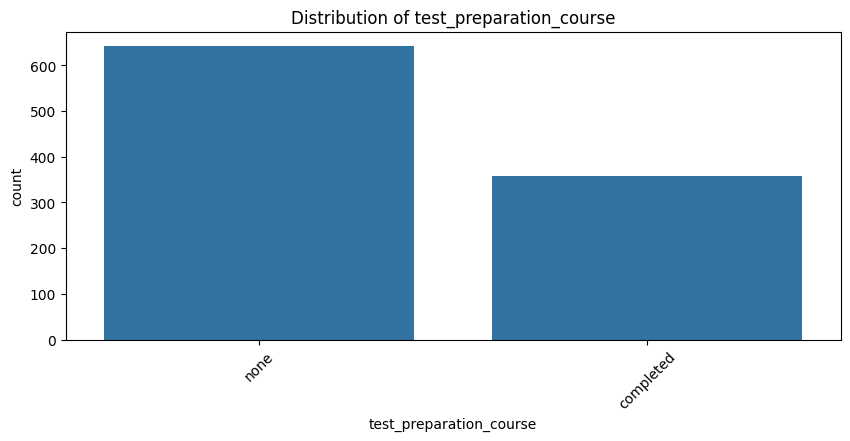

In [47]:
#Check Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### 3.1) Adding Columns 

In [48]:
df['Total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [49]:
df['percentage'] = round((df['Total'] / 300) * 100, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### Univariate Analysis

In [50]:
#Avg percentage by gender
avg_percentage = df.groupby('gender')['percentage'].mean().reset_index()
avg_percentage

,gender,percentage
0,female,69.569498
1,male,65.837303


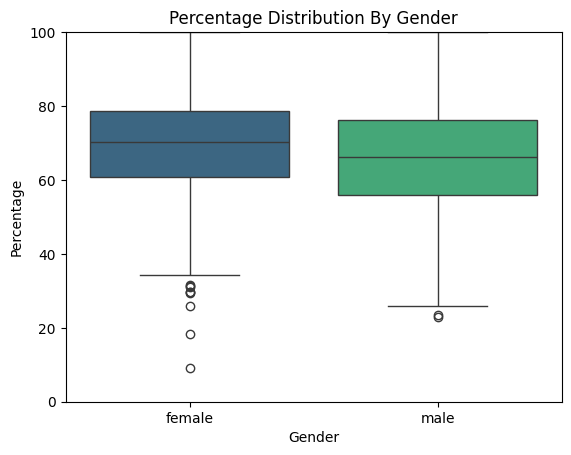

In [59]:
# Calculate average percentage by gender
sns.boxplot(data=df, x='gender', y='percentage', palette='viridis')
plt.title('Percentage Distribution By Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()





##### Insight 
- On average a female student scores more than a male student 

In [52]:
#avg percentage by race_ethnicity
avg_percentage = df.groupby('race_ethnicity')['percentage'].mean().reset_index()
avg_percentage

,race_ethnicity,percentage
0,group A,62.992135
1,group B,65.468579
2,group C,67.131567
3,group D,69.179389
4,group E,72.752000


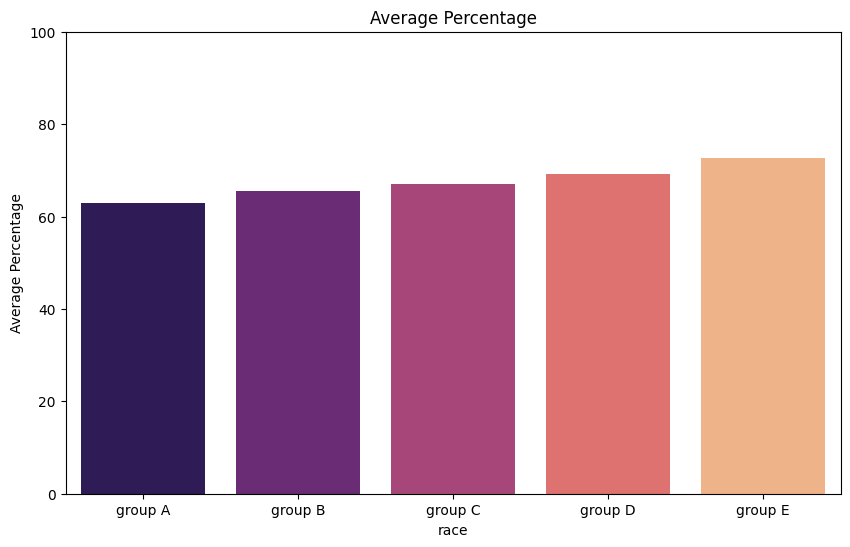

In [53]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_percentage, x='race_ethnicity', y='percentage', palette='magma')
plt.title('Average Percentage')
plt.ylabel('Average Percentage')
plt.xlabel('race')
plt.ylim(0, 100)
plt.show()

- Group A & Group B has the lowest average percentage , Group E has the highest average percentage

In [54]:
# avg percentage by parental_level_of_education
avg_percentage = df.groupby('parental_level_of_education')['percentage'].mean().reset_index()
avg_percentage


,parental_level_of_education,percentage
0,associate's degree,69.568964
1,bachelor's degree,71.923983
2,high school,63.097194
3,master's degree,73.598644
4,some college,68.476106
5,some high school,65.107654


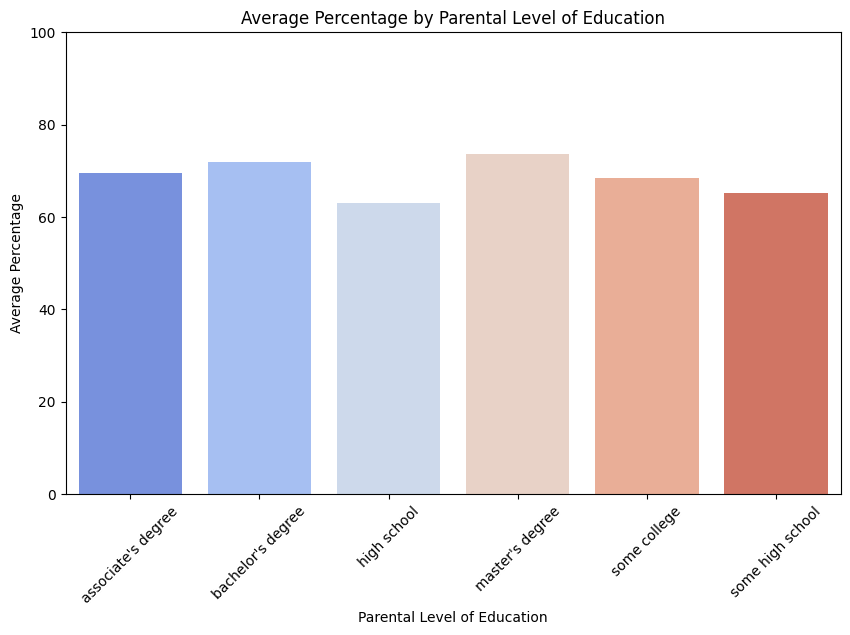

In [55]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_percentage, x='parental_level_of_education', y='percentage', palette='coolwarm')
plt.title('Average Percentage by Parental Level of Education')
plt.ylabel('Average Percentage')
plt.xlabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

### Insights:
- The students with higher parental education levels tend to have higher average percentages.

In [56]:
# avg percentage by test_preparation_course
avg_percentage = df.groupby('test_preparation_course')['percentage'].mean().reset_index()
avg_percentage


,test_preparation_course,percentage
0,completed,72.669469
1,none,65.038801


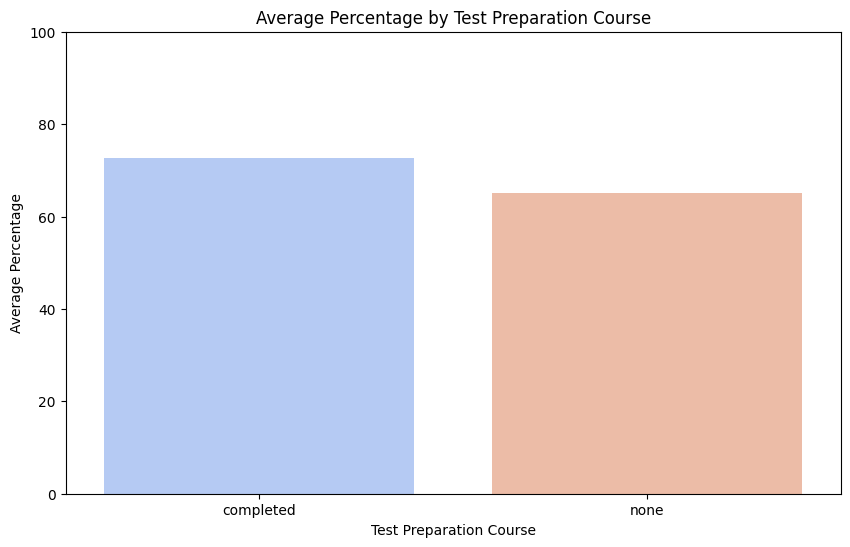

In [57]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_percentage, x='test_preparation_course', y='percentage', palette='coolwarm')
plt.title('Average Percentage by Test Preparation Course')
plt.ylabel('Average Percentage')
plt.xlabel('Test Preparation Course')
plt.ylim(0, 100)
plt.show()

### Insights:
- The students who completed the test preparation course have a higher average percentage compared to those who did not complete it.

### Bivariate Analysis & Multivariate Analysis

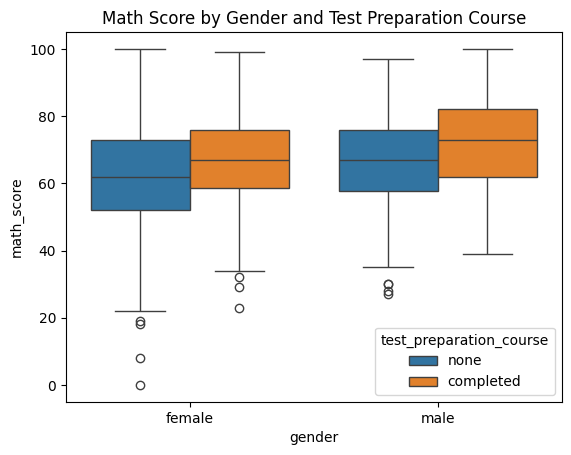

In [60]:
# Boxplot: Math Score by Gender and Test Preparation Course
sns.boxplot(x='gender', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Gender and Test Preparation Course')
plt.show()

#### Insight
- Completing the test preparation course leads to higher math scores for both genders.
- Males who completed the course have the highest median math scores.
- The course has a positive impact regardless of gender.

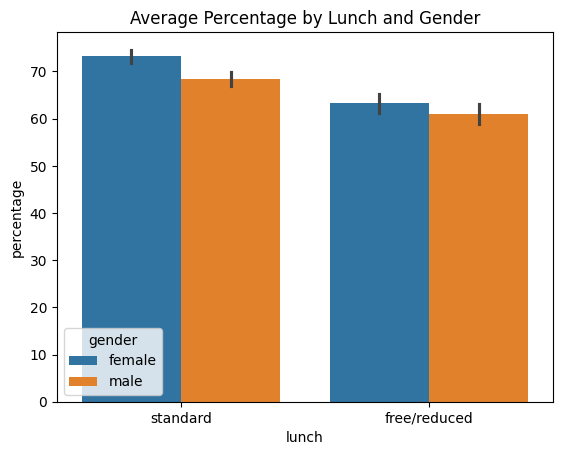

In [62]:
# Barplot: Average Percentage by Lunch and Gender
sns.barplot(x='lunch', y='percentage', hue='gender', data=df)
plt.title('Average Percentage by Lunch and Gender')
plt.show()

#### Insight
- Students with standard lunch have higher average percentages than those with free/reduced lunch, for both genders.
- Female students outperform male students in both lunch categories.
- The gap between standard and free/reduced lunch is consistent across genders.

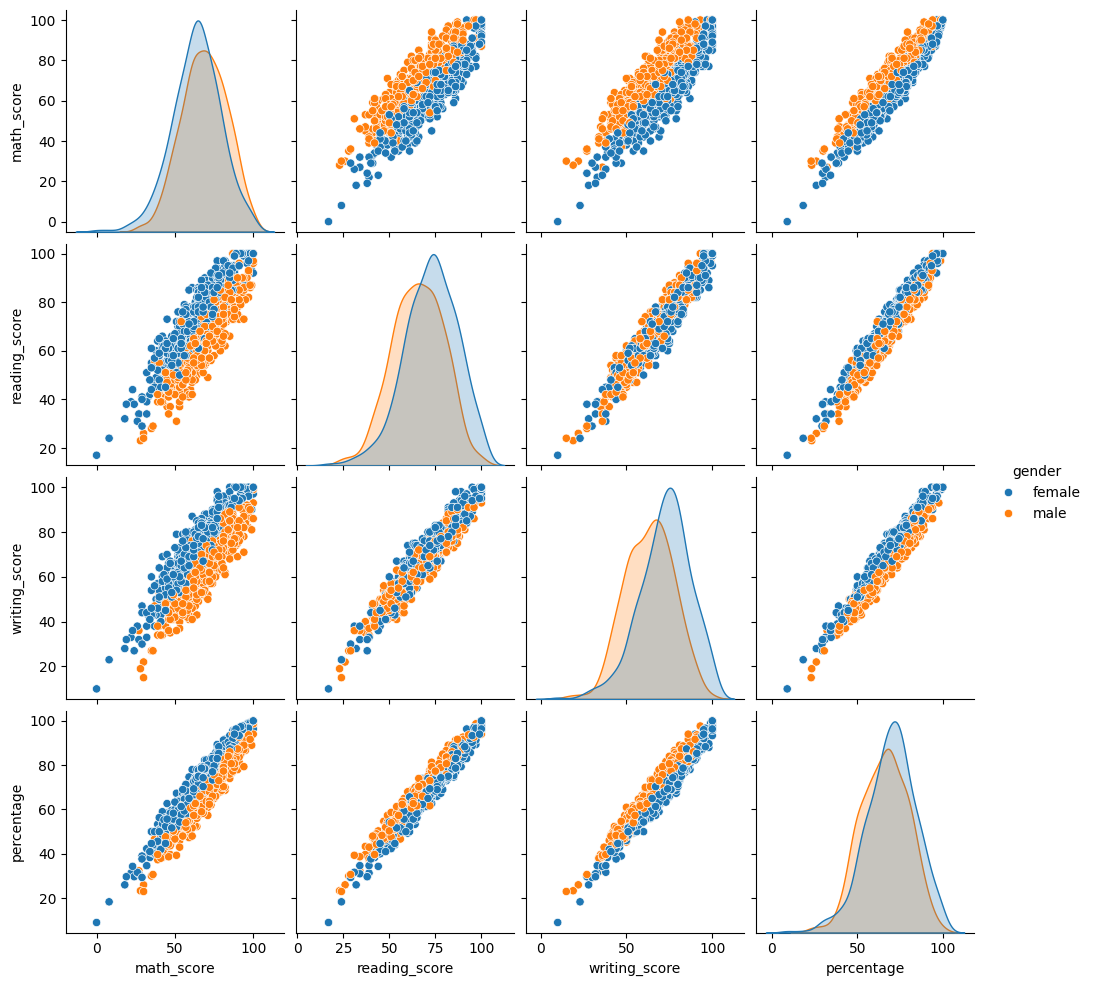

In [63]:
# Pairplot colored by gender
sns.pairplot(df, vars=['math_score', 'reading_score', 'writing_score', 'percentage'], hue='gender')
plt.show()

#### Insight
- There is a strong positive correlation between math, reading, and writing scores.
- The overall percentage is highly correlated with all three subject scores.
- Score distributions are slightly higher for females, especially in reading and writing.
- Both genders show similar linear relationships between the different scores.

### Conclusion

- Female students tend to outperform male students in overall percentage and across most subjects.
- Students from Group E have the highest average percentages, while Groups A and B have the lowest.
- Higher parental education levels are associated with better student performance.
- Completing the test preparation course leads to higher scores, especially in math, for both genders.
- Students with standard lunch have higher average percentages than those with free/reduced lunch, and this trend is consistent for both genders.
- There is a strong positive correlation between math, reading, and writing scores, and the overall percentage is highly correlated with all three.
- Score distributions are slightly higher for females, especially in reading and writing, but both genders show similar linear relationships between the different scores.